In [47]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [48]:
picher = pd.read_csv('../z20_data/picher_stats_2017.csv')
picher.shape

(152, 22)

In [49]:
picher_target =  picher['연봉(2018)'].to_numpy()
picher_input = picher[['FIP','WAR','볼넷/9','삼진/9','연봉(2017)']].to_numpy()

In [50]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target = train_test_split(
    picher_input,picher_target,random_state=42
)

In [51]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled,train_target)

LogisticRegression()

In [53]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.008771929824561403
0.0


In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input) # 특성이 추가됨
test_poly = poly.transform(test_input)


In [55]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled,train_target)


Ridge()

In [56]:
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9183709869081702
0.8675487496173964


In [57]:
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100] # 6개

for alpha in alpha_list :
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))

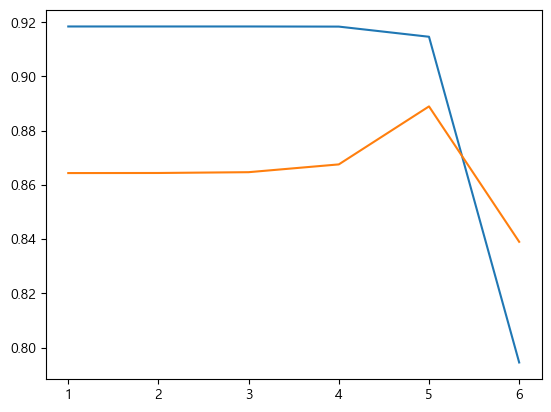

In [58]:
x = np.arange(1,7).reshape(-1,1)
plt.plot(x,train_score)
plt.plot(x,test_score)

In [59]:
ridge = Ridge(alpha=10)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9146248487099662
0.8889358101739502
